# Prueba de selección Pactia

## Carga de datos y exploración de archivos

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%%bash
ls variables_externas/

ipc.xlsx
tasa_desempleo.xlsx
trm.xlsx


In [3]:
%%bash
ls variables_internas/

test.xlsx
train.xlsx


In [4]:
variables_externas=os.listdir("variables_externas/")
pve = "variables_externas/"
print(variables_externas)

['ipc.xlsx', 'tasa_desempleo.xlsx', 'trm.xlsx']


In [5]:
ipc = pd.read_excel(pve+variables_externas[0])
tasa_desempleo = pd.read_excel(pve+variables_externas[1])
trm = pd.read_excel(pve+variables_externas[2])

In [6]:
variables_internas=os.listdir("variables_internas/")
pvi = "variables_internas/"

In [7]:
test =  pd.read_excel(pvi+variables_internas[0])
train =  pd.read_excel(pvi+variables_internas[1])

### Exploración de variables

In [8]:
ipc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7291 entries, 0 to 7290
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Mes                      7291 non-null   object        
 1   Año                      7291 non-null   int64         
 2   Año(aaaa)-Mes(mm)        7291 non-null   object        
 3   Fecha (DD/MM/AAAA)       7291 non-null   object        
 4   Ciudad                   7291 non-null   object        
 5   Orden                    7291 non-null   int64         
 6   IPC                      7291 non-null   float64       
 7   Variación anual %        7037 non-null   float64       
 8   Variación año corrido %  7290 non-null   float64       
 9   Variación mensual %      7290 non-null   float64       
 10  Nivel Id                 7291 non-null   int64         
 11  Gasto Id                 7291 non-null   int64         
 12  Año mes                  7291 non-

In [9]:
ipc=ipc.drop(['Mes','Año','Año(aaaa)-Mes(mm)','Fecha (DD/MM/AAAA)','Año mes','año','mes'], axis=1)

In [10]:
tasa_desempleo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Año(aaaa)-Mes(mm)         246 non-null    object        
 1   Mes nombre español        246 non-null    object        
 2   Id agrupacion             246 non-null    int64         
 3   Tasa empleo               246 non-null    float64       
 4   Tasa desempleo            246 non-null    float64       
 5   Fecha cargue maxima       246 non-null    int64         
 6   Version                   246 non-null    object        
 7   Codigo metodologia        246 non-null    int64         
 8   'Metodología: '           246 non-null    object        
 9   Descripcion  metodologia  246 non-null    object        
 10  fecha                     246 non-null    datetime64[ns]
 11  año                       246 non-null    int64         
 12  mes                   

In [11]:
tasa_desempleo=tasa_desempleo.drop(['Mes nombre español','Año(aaaa)-Mes(mm)','año','mes'], axis=1)

In [12]:
trm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10844 entries, 0 to 10843
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   fecha   10844 non-null  datetime64[ns]
 1   trm     10844 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 169.6 KB


In [13]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   fecha               217 non-null    datetime64[ns]
 1   mes                 217 non-null    int64         
 2   año                 217 non-null    int64         
 3   trafico_dia         217 non-null    float64       
 4   categoria           217 non-null    object        
 5   venta_diaria        217 non-null    float64       
 6   area_total_ocupada  217 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 12.0+ KB


In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4343 entries, 0 to 4342
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   fecha               4343 non-null   datetime64[ns]
 1   mes                 4343 non-null   int64         
 2   año                 4343 non-null   int64         
 3   trafico_dia         4343 non-null   float64       
 4   categoria           4343 non-null   object        
 5   venta_diaria        4343 non-null   float64       
 6   area_total_ocupada  4343 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 237.6+ KB


## Análisis exploratorio y estadística descriptiva

Se realizará un análisis descriptivo de las bases de datos, las variables externas estarán condicionadas a las internas, es decir, tomaremos las fechas en común y descartaremos el resto.

In [15]:
train["particion"] = "train"
test["particion"] = "test"

In [16]:
full_union_df = pd.concat([train,test]).drop(['mes','año'],axis=1)

In [17]:
full_union_df.head()

,fecha,trafico_dia,categoria,venta_diaria,area_total_ocupada,particion
0,2019-01-01,4481.0,COMIDAS Y BARES,3.487444e+07,721.903,train
1,2019-01-01,4481.0,ENTRETENIMIENTO,4.204079e+06,1883.453,train
2,2019-01-01,4481.0,HIPERMERCADO,2.318765e+07,6225.960,train
3,2019-01-01,4481.0,HOGAR,3.491659e+04,104.078,train
4,2019-01-01,4481.0,MODA Y CALZADO,9.370870e+06,2399.566,train


Ahora se unirá la información exógena.

In [18]:
full_union_df = full_union_df.merge(
    ipc, how='left', on='fecha').merge(
    tasa_desempleo, how='left', on='fecha').merge(
    trm, how='left', on='fecha')

In [19]:
full_union_df.head(6)

,fecha,trafico_dia,categoria,venta_diaria,area_total_ocupada,particion,Ciudad,Orden,IPC,Variación anual %,...,Gasto Id,Id agrupacion,Tasa empleo,Tasa desempleo,Fecha cargue maxima,Version,Codigo metodologia,'Metodología: ',Descripcion metodologia,trm
0,2019-01-01,4481.0,COMIDAS Y BARES,3.487444e+07,721.903,train,NaN,NaN,NaN,NaN,...,NaN,3.0,55.333559,12.795458,2.019012e+15,Ultima,2.0,Metodología:,Proyecciones calculadas en 2012,3249.75
1,2019-01-01,4481.0,ENTRETENIMIENTO,4.204079e+06,1883.453,train,NaN,NaN,NaN,NaN,...,NaN,3.0,55.333559,12.795458,2.019012e+15,Ultima,2.0,Metodología:,Proyecciones calculadas en 2012,3249.75
2,2019-01-01,4481.0,HIPERMERCADO,2.318765e+07,6225.960,train,NaN,NaN,NaN,NaN,...,NaN,3.0,55.333559,12.795458,2.019012e+15,Ultima,2.0,Metodología:,Proyecciones calculadas en 2012,3249.75
3,2019-01-01,4481.0,HOGAR,3.491659e+04,104.078,train,NaN,NaN,NaN,NaN,...,NaN,3.0,55.333559,12.795458,2.019012e+15,Ultima,2.0,Metodología:,Proyecciones calculadas en 2012,3249.75
4,2019-01-01,4481.0,MODA Y CALZADO,9.370870e+06,2399.566,train,NaN,NaN,NaN,NaN,...,NaN,3.0,55.333559,12.795458,2.019012e+15,Ultima,2.0,Metodología:,Proyecciones calculadas en 2012,3249.75
5,2019-01-02,9163.0,COMIDAS Y BARES,3.048469e+07,721.903,train,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3249.75


In [23]:
full_union_df.columns

Index(['fecha', 'trafico_dia', 'categoria', 'venta_diaria',
       'area_total_ocupada', 'particion', 'Ciudad', 'Orden', 'IPC',
       'Variación anual %', 'Variación año corrido %', 'Variación mensual %',
       'Nivel Id', 'Gasto Id', 'Id agrupacion', 'Tasa empleo',
       'Tasa desempleo', 'Fecha cargue maxima', 'Version',
       'Codigo metodologia', ''Metodología: '', 'Descripcion  metodologia',
       'trm'],
      dtype='object')

In [25]:
full_union_df.index = full_union_df.fecha

A continuación realizamos una descripción básica de los datos, tanto para variables numéricas como categóricas, con el fin de observar sus magnitudes, rangos, modas, etc.

In [41]:
full_union_df.describe(include='all', datetime_is_numeric=True)

,fecha,trafico_dia,categoria,venta_diaria,area_total_ocupada,particion,Ciudad,Orden,IPC,Variación anual %,...,Gasto Id,Id agrupacion,Tasa empleo,Tasa desempleo,Fecha cargue maxima,Version,Codigo metodologia,'Metodología: ',Descripcion metodologia,trm
count,7860,7860.000000,7860,7.860000e+03,7860.000000,7860,3450,3450.000000,3450.000000,3395.000000,...,3450.0,150.0,150.000000,150.000000,1.500000e+02,150,150.0,150,150,7860.000000
unique,NaN,NaN,8,NaN,NaN,2,23,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1,NaN,1,1,NaN
top,NaN,NaN,COMIDAS Y BARES,NaN,NaN,train,"Bogotá, D.C.",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Ultima,NaN,Metodología:,Proyecciones calculadas en 2012,NaN
freq,NaN,NaN,1415,NaN,NaN,7489,150,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,150,NaN,150,150,NaN
mean,2020-03-22 22:41:02.290076416,8079.891157,NaN,3.126633e+07,2112.604098,NaN,NaN,12.000000,104.271757,2.756074,...,0.0,3.0,52.842363,13.763093,2.019803e+15,NaN,2.0,NaN,NaN,3520.101712
min,2019-01-01 00:00:00,1325.000000,NaN,7.983494e-06,47.450000,NaN,NaN,1.000000,100.250000,-1.370000,...,0.0,3.0,41.570360,9.250949,2.019012e+15,NaN,2.0,NaN,NaN,3072.010000
25%,2019-08-27 18:00:00,6665.000000,NaN,2.015301e+06,156.104000,NaN,NaN,6.000000,102.840000,1.940000,...,0.0,3.0,50.631096,10.716077,2.019082e+15,NaN,2.0,NaN,NaN,3339.190000
50%,2020-04-14 00:00:00,8166.500000,NaN,1.269216e+07,1475.331000,NaN,NaN,12.000000,104.320000,2.940000,...,0.0,3.0,53.411028,13.311192,2.020042e+15,NaN,2.0,NaN,NaN,3507.110000
75%,2020-10-31 00:00:00,10033.000000,NaN,4.796437e+07,2646.423000,NaN,NaN,18.000000,105.740000,3.670000,...,0.0,3.0,56.335644,15.885255,2.020102e+15,NaN,2.0,NaN,NaN,3736.910000
max,2021-03-31 00:00:00,15921.000000,NaN,2.861563e+08,6225.960000,NaN,NaN,23.000000,109.110000,5.830000,...,0.0,3.0,57.847793,21.378492,2.021032e+15,NaN,2.0,NaN,NaN,4153.910000


### Tráfico día

El tráfico día se comporta igual para todas las categorías, ya que este tiene que ver con el flujo de personas que ingresan a los cc, por lo tanto, basta con ver una sola categoría para ver su comportmaiento.

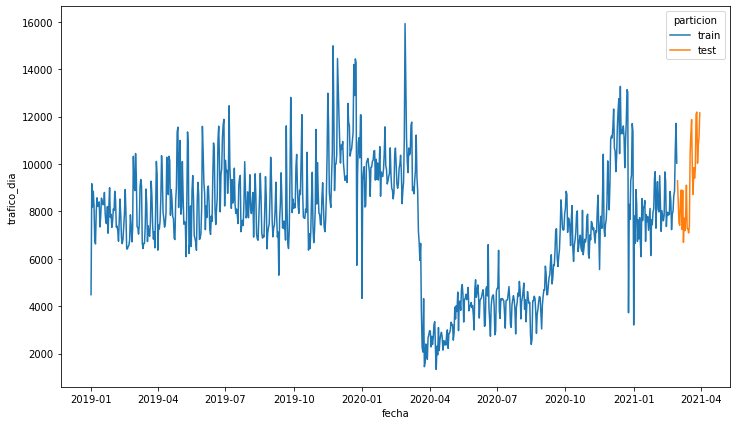

In [31]:
plt.figure(figsize=(12,7))
sns.lineplot(x='fecha',y='trafico_dia', hue='particion', data=full_union_df[full_union_df.categoria=='COMIDAS Y BARES'])
plt.show()

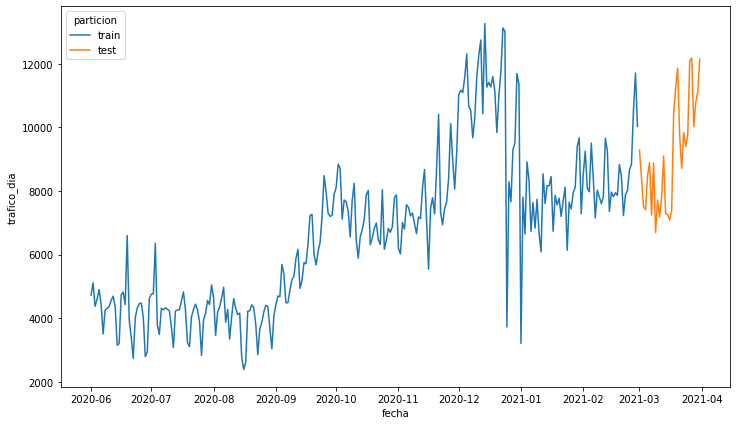

In [32]:
plt.figure(figsize=(12,7))
sns.lineplot(x='fecha',y='trafico_dia', hue='particion', data=full_union_df[full_union_df.categoria=='OTROS'])
plt.show()

**Se observa** que el tráfico día tiene un comportamiento estacionario con un pico importante en 2020 debido a la **pandemia**, no todas las categorías tienen el mismo registro histórico, como se evidencia en _OTROS_ y _COMIDAS Y BARES_.

### venta diaria

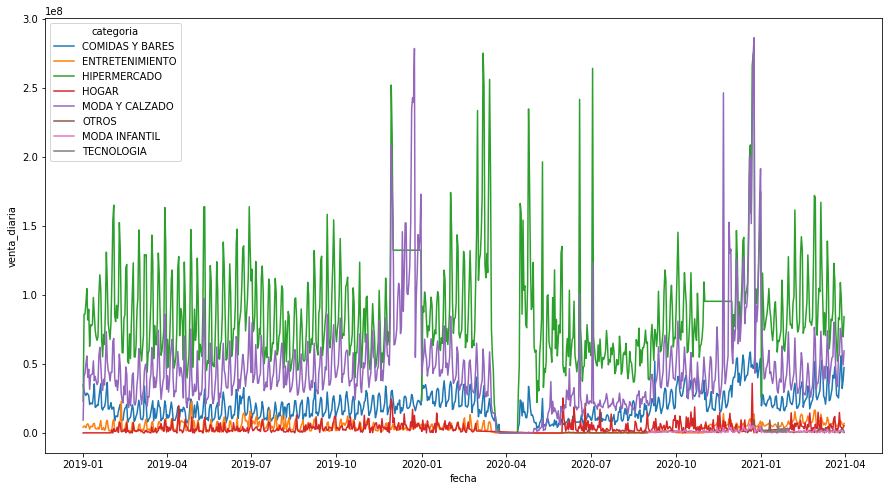

In [35]:
plt.figure(figsize=(15,8))
sns.lineplot(x='fecha',y='venta_diaria', hue='categoria', data=full_union_df)
plt.show()

Hay claramente diferencia en el monto de las ventas de algunas categorías respecto a otras, por ejemplo, _HIPERMERCADO_ es la categoría que más vende, seguida de _MODA Y CALZADO_, lo que sugiere tener en cuenta esta variable ya sea para realizar un modelo predictivo por categoría o un modelo que tenga en cuenta esta variable para ajustar las predicciones. El efecto estacional se puede ver más claramente en un año:

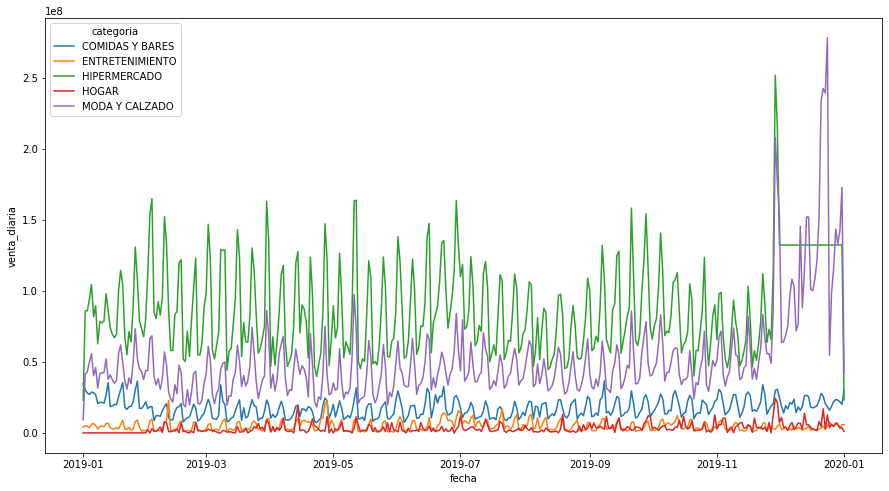

In [37]:
plt.figure(figsize=(15,8))
sns.lineplot(x='fecha',y='venta_diaria', hue='categoria', data=full_union_df[full_union_df.fecha<='2020-01-01'])
plt.show()

Se observa además que la categoría _MODA Y CALZADO_ supera en ventas a la categoría _HIPERMERCADO_ en diciembre, por lo que el mes juega también un papel importante. Cabe resaltar que una variable que debe añadirse es la pandemia:

### Añadimos variable _pandemia_

La pandemia afectó principalmente el comercio y las interacciones sociales en el 2020, por lo que usaremos este año como marcador de pandemia en el comportamiento de acuerdo al seiguiente [decreto](https://dapre.presidencia.gov.co/normativa/normativa/DECRETO%20655%20DEL%2028%20DE%20ABRIL%20DE%202022.pdf):

In [77]:
full_union_df['pandemia'] = np.where( np.logical_and(full_union_df.fecha >='2020-03-20',
                                       full_union_df.fecha <='2020-12-31'), '1', '0')

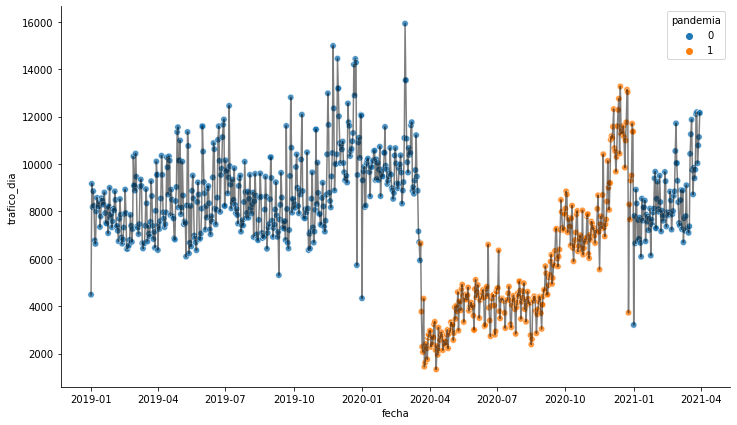

In [78]:
plt.figure(figsize=(12,7))
sns.lineplot(x='fecha',y='trafico_dia',  color='black', alpha=0.5,
             data=full_union_df[full_union_df.categoria=='COMIDAS Y BARES'])
sns.scatterplot(x='fecha',y='trafico_dia', hue='pandemia', s=40, alpha=0.8,
             data=full_union_df[full_union_df.categoria=='COMIDAS Y BARES'])
sns.despine()
plt.show()

Se observa que la pandemia genera un cambio estructural en la serie de las ventas.

### Ciudad

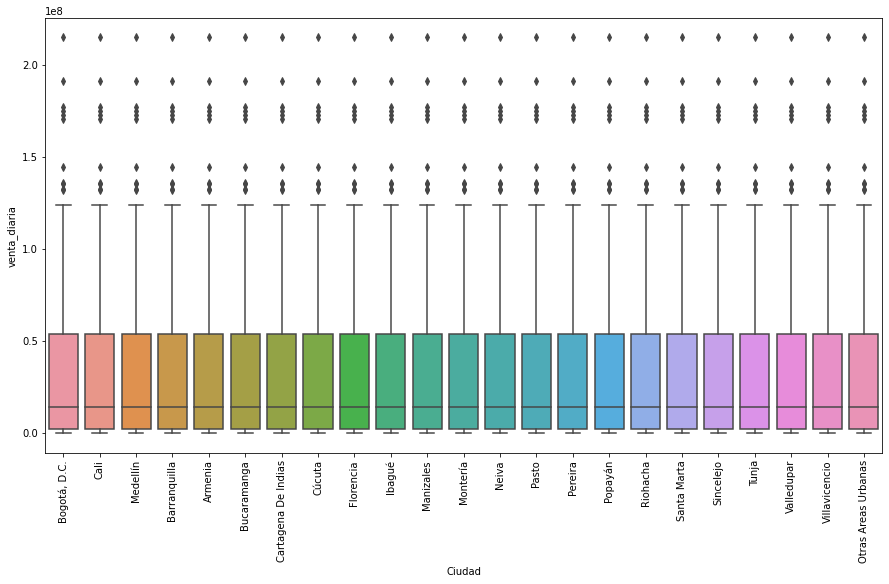

In [89]:
plt.figure(figsize=(15,8))
ax=sns.boxplot(x='Ciudad',y='venta_diaria', data=full_union_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

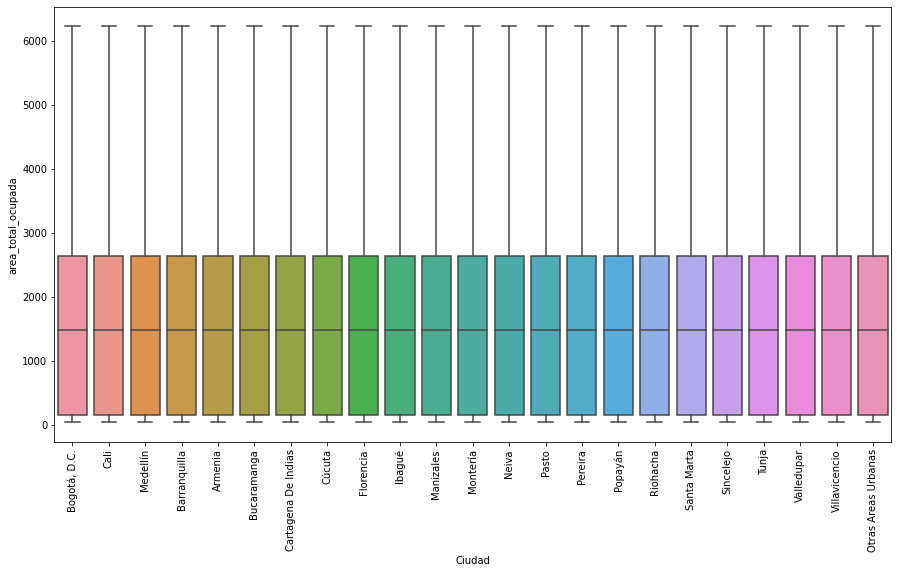

In [90]:
plt.figure(figsize=(15,8))
ax=sns.boxplot(x='Ciudad',y='area_total_ocupada', data=full_union_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

La ciudad no discrimina en este caso por ventas o espacio total ocupado, por lo que no se tomará en cuenta para posteriores análisis.

### IPC

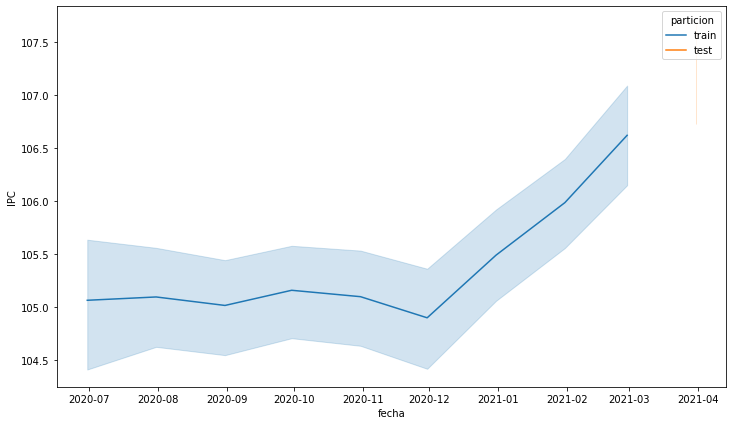

In [94]:
plt.figure(figsize=(12,7))
sns.lineplot(x='fecha',y='IPC', hue='particion', data=full_union_df[full_union_df.categoria=='OTROS'])
plt.show()

Como es una medida mensual, se observa un incremento, veremos más adelante si este se relaciona con otras variables.